# AI Health Course Work
# MSc Artificial Intelligence


Project Introduction :-
The George B. Moody PhysioNet Challenges are a series of data analysis challenges in the field of biomedical engineering and computational physiology. These challenges are designed to encourage researchers and data scientists to develop new algorithms and methods for analyzing large datasets of physiological signals, such as electrocardiograms (ECGs), blood pressure signals, and respiratory waveforms

Course Work Objective :-
The objective of the Challenge is to analyze heart sound recordings collected from various auscultation locations on the body using a digital stethoscope, and accurately identify the presence, absence, or unclear cases of murmurs with the implementation of AI techniques and algorithms.

Here we are implementing VGG16 model to our wav image dataset

1. Extracting the dataset
2. Converting the wav file of each patient to spectrogram images with the help of librosa 
3. Spliting the dataset
4. Finding  mean and standard deviation of datatset
5. Image transformation and Dataloader 
6. VGG16 Model
7. Training and testing
8. Classification Report
9. Confuxion matrix

### Importing libraries/Packages

In [1]:
from helper_code import *
import numpy as np, scipy as sp, os, sys, joblib
import librosa
from matplotlib import pyplot as plt
import librosa.display
import numpy as np
from PIL import Image
import torch.utils.data as data
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models 

import pandas as pd

import scipy.stats as stats
import seaborn as sns

from models import *

c:\Users\deepe\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\deepe\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Exploratory Data Analysis

#### Locating files from the directory

In [2]:
path='training_data'
for file in os.listdir(path=path):
    if file.endswith(".wav"):
        # print(file)
        y, sr = librosa.load(os.path.join(path, file), sr=4000)
        break
        # if sr != 22050:
        print('current audio sampling rate', sr)

#### Audio duration of file, Taking sample duration of one

In [3]:
print("audio duration: ", librosa.get_duration(y=y, sr = sr))

audio duration:  21.296


#### Loading dataset

In [4]:
import pandas as pd
CSV_data = data_set = pd.read_csv('training_data.csv')
print(CSV_data.head(6))

   Patient ID Recording locations:    Age     Sex  Height  Weight  \
0        2530          AV+PV+TV+MV  Child  Female    98.0    15.9   
1        9979          AV+PV+TV+MV  Child  Female   103.0    13.1   
2        9983          AV+PV+TV+MV  Child    Male   115.0    19.1   
3       13918          AV+PV+TV+MV  Child    Male    98.0    15.9   
4       14241          AV+PV+TV+MV  Child    Male    87.0    11.2   
5       14998          AV+PV+TV+MV  Child    Male     NaN     NaN   

   Pregnancy status   Murmur Murmur locations Most audible location  ...  \
0             False   Absent              NaN                   NaN  ...   
1             False  Present      AV+MV+PV+TV                    TV  ...   
2             False  Unknown              NaN                   NaN  ...   
3             False  Present               TV                    TV  ...   
4             False  Present      AV+MV+PV+TV                    PV  ...   
5             False   Absent              NaN               

#### Checking for how many data are missing

In [5]:
CSV_data.isnull().sum()

Patient ID                    0
Recording locations:          0
Age                          74
Sex                           0
Height                      116
Weight                      105
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64

#### Replacing the NaN data with mode (MOST Common Value) in Height and Weight column

In [6]:
CSV_data['Height'].fillna(value=CSV_data['Height'].mode()[0], inplace=True)
CSV_data['Weight'].fillna(value=CSV_data['Weight'].mode()[0], inplace=True)

In [7]:
CSV_data.isnull().sum()

Patient ID                    0
Recording locations:          0
Age                          74
Sex                           0
Height                        0
Weight                        0
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64

In [8]:
CSV_data.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


#### Checking shape of our dataset

In [9]:
data_set.shape

(942, 23)

#### Dropping duplicate values from dataset if there is any present in it

In [10]:
data_set.drop_duplicates()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


##### Checking for each individual column, how many null values they have in each column

In [11]:
data_set.isnull().sum()

Patient ID                    0
Recording locations:          0
Age                          74
Sex                           0
Height                        0
Weight                        0
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64

<Axes: >

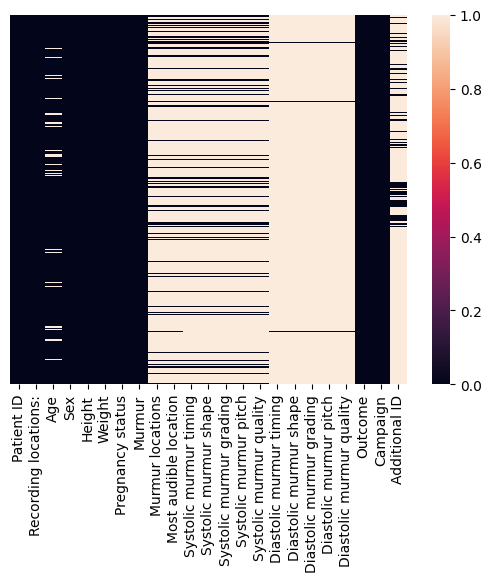

In [12]:
sns.heatmap(data_set.isnull(),yticklabels=False)

In [13]:
data_set.replace(np.nan,'Unknown',inplace=True)

#### Distribution of Genders as Male and Female

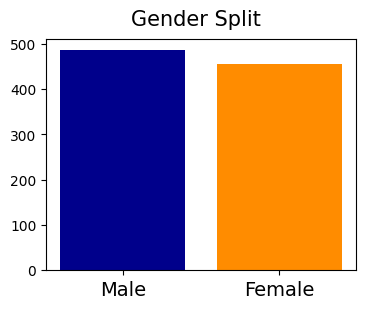

In [14]:
fig, ax = plt.subplots(1, figsize=(4,3))
plt.suptitle('Gender Split', fontsize=15)
ax.bar(data_set['Sex'].value_counts().index, 
       data_set['Sex'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Male','Female'], fontsize = 14);

In [15]:
data_set.Sex.value_counts()

Female    486
Male      456
Name: Sex, dtype: int64

#### Distribution of people over diffrent age groups

In [16]:
data_set.Age.value_counts()

Child         664
Infant        126
Unknown        74
Adolescent     72
Neonate         6
Name: Age, dtype: int64

<BarContainer object of 5 artists>

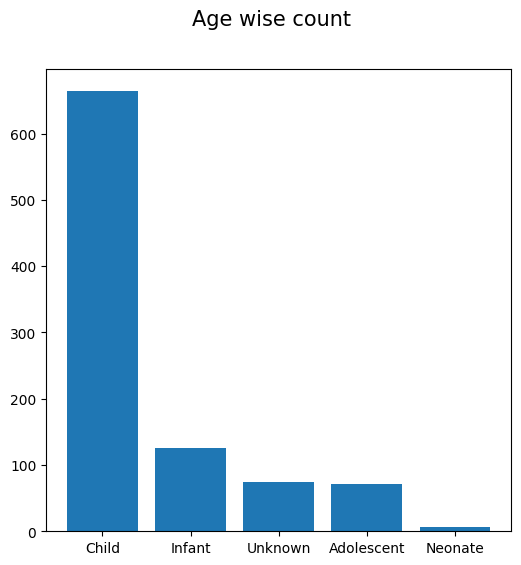

In [17]:
fig, ax = plt.subplots(1, figsize=(6,6))
plt.suptitle('Age wise count', fontsize=15)
ax.bar(data_set['Age'].value_counts().index, 
       data_set['Age'].value_counts().values)


#### Comparing different age groups for murmus with their gender

In [18]:
data_set.Murmur.value_counts()

Absent     695
Present    179
Unknown     68
Name: Murmur, dtype: int64

In [19]:
data_set['murmur'] = [1 if x == 'Absent' else 2 if x == 'Present' else 0 for x in data_set['Murmur']]

<Axes: xlabel='Age'>

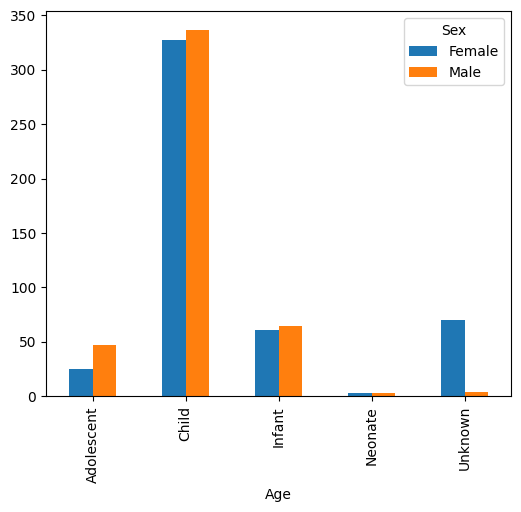

In [20]:
df = data_set.groupby(['Age','Sex'])['murmur'].count().unstack(fill_value=0)
df.plot.bar(figsize=(6,5))

#### Condition of Patients as Murmur, comparing it with gender types and condition of patient as outcome

<Axes: xlabel='Sex'>

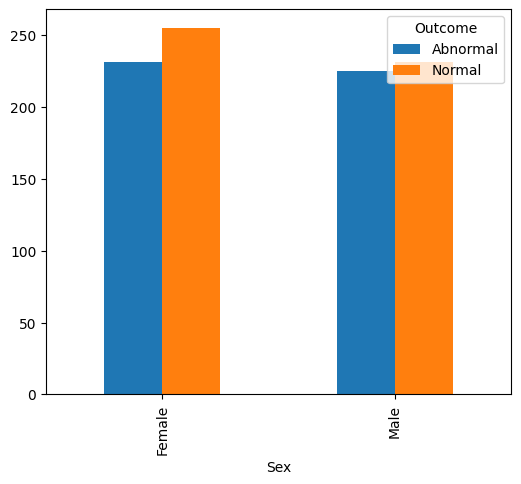

In [21]:
df = data_set.groupby(['Sex','Outcome'])['murmur'].count().unstack(fill_value=0)
df.plot.bar(figsize=(6,5))

#### Murmur availability according to outcome of patient condition

<Axes: xlabel='Murmur'>

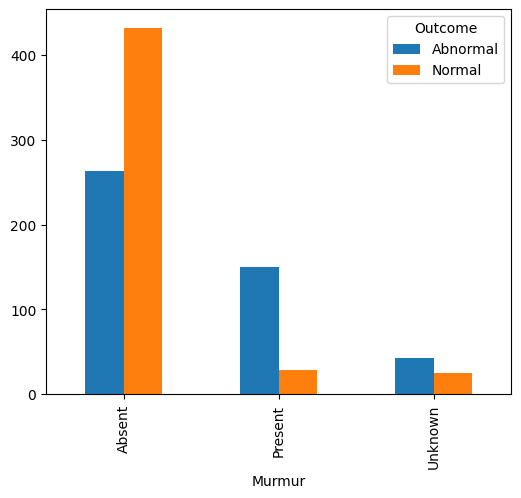

In [22]:
df = data_set.groupby(['Murmur','Outcome'])['murmur'].count().unstack(fill_value=0)
df.plot.bar(figsize=(6,5))

#### Murmur status by Age

<Axes: xlabel='Murmur'>

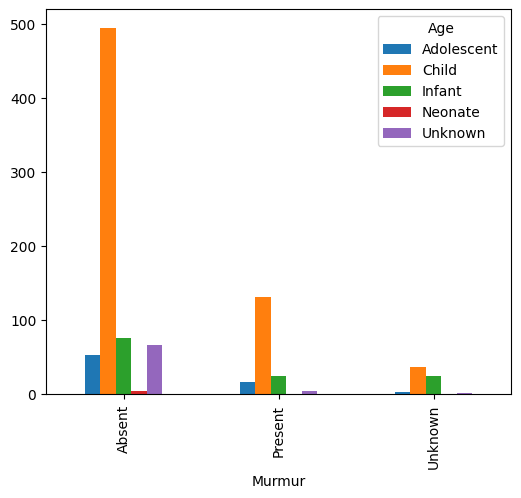

In [23]:
df = data_set.groupby(['Murmur','Age'])['murmur'].count().unstack(fill_value=0)
df.plot.bar(figsize=(6,5))

In [24]:
data_set.groupby(['Outcome'])['murmur']

In [25]:
data_set['Sex'] = [1 if x == 'Female' else 0 for x in data_set.Sex]


In [26]:
dic = { 'Unknown':0,
    'Child' : 1,        
    'Infant':2,              
    'Adolescent':3,     
    'Neonate':4 }

In [27]:
data_set.replace({"Age": dic},inplace = True)

In [28]:
data_set.Outcome = [1 if x == 'Abnormal' else 0 for x in data_set.Outcome]

#### Exploring spectrogram and frequency wave of audio file

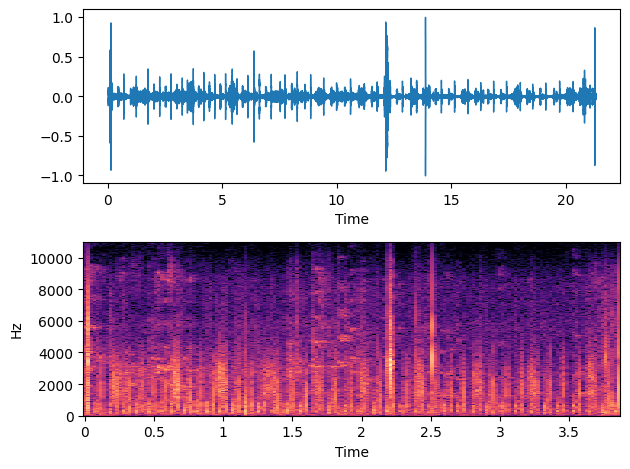

In [29]:
D = librosa.stft(y, hop_length=512, win_length = 1000)   #stft of y
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

fig, ax = plt.subplots(nrows = 2)

librosa.display.waveshow(y, sr=sr, ax = ax[0])
img = librosa.display.specshow(S_db,  x_axis='time', y_axis = 'linear', ax = ax[1])
# ax[1].set(title = 'Linear Spectogram')
# fig.colorbar(img, ax=ax[1], format = "%+2.f dB")
fig.tight_layout()

plt.show()

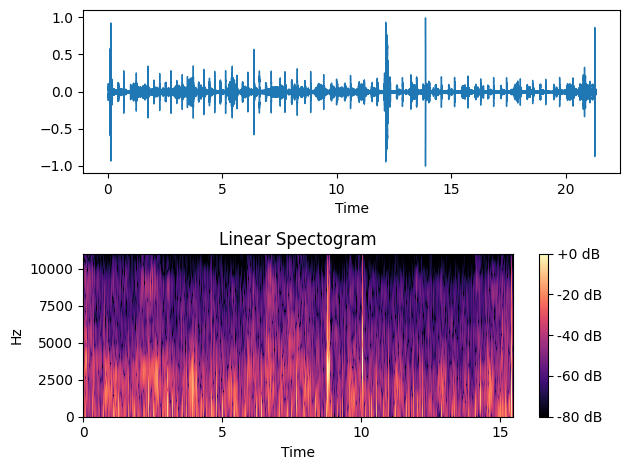

In [30]:
D = librosa.stft(y, hop_length=16, win_length = 32)   #stft of y
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

fig, ax = plt.subplots(nrows = 2)

librosa.display.waveshow(y, sr=sr, ax = ax[0])
img = librosa.display.specshow(S_db, hop_length=64, x_axis='time', y_axis = 'linear', ax = ax[1])
ax[1].set(title = 'Linear Spectogram')
fig.colorbar(img, ax=ax[1], format = "%+2.f dB")
fig.tight_layout()

plt.show()

#### To identify simliar sounds in file we are exploring - Mel frequency cepstral coefficients (MFCC)

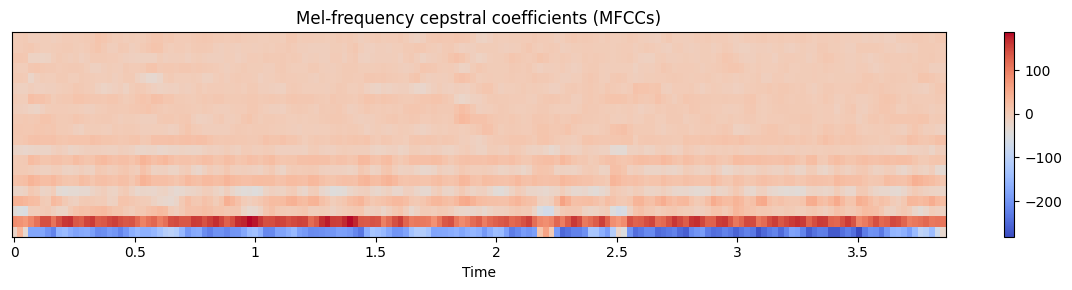

In [31]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

import numpy as np
import pandas as pd
import librosa

In [ ]:
data_folder = 'training_data'   #folder location of dataset

patient_files = find_patient_files(data_folder)
num_patient_files = len(patient_files)

In [ ]:
num_patient_files

940

In [ ]:
if num_patient_files==0:
        raise Exception('No data was provided.')

# Create a folder for the model if it does not already exist.
# os.makedirs(model_folder, exist_ok=True)

# Extract the features and labels.
# if verbose >= 1:
#     print('Extracting features and labels from the Challenge data...')

murmur_classes = ['Present', 'Unknown', 'Absent']
num_murmur_classes = len(murmur_classes)



In [ ]:
features = list()
murmurs = list()


In [ ]:
#loading files
def load_recordings(data_folder, data):
    num_locations = get_num_locations(data)
    recording_information = data.split('\n')[1:num_locations+1]


    filenames = list()
    for i in range(num_locations):
        entries = recording_information[i].split(' ')
        recording_file = entries[2]
        filename = os.path.join(data_folder, recording_file)
        filenames.append(filename)
    return filenames

In [ ]:
for i in range(num_patient_files):
    # if verbose >= 2:
    #     print('    {}/{}...'.format(i+1, num_patient_files))

    # Load the current patient data and recordings.
    current_patient_data = load_patient_data(patient_files[i])
    current_recordings = load_recordings(data_folder, current_patient_data)


    #Extract Features or use the above for dataset and dataloder

    features.append(current_recordings)

    for i in range(len(np.asarray(np.hstack(current_recordings)))):
        
        murmur = get_murmur(current_patient_data)

        # current_murmur = np.zeros(num_murmur_classes, dtype=int)
        # if murmur in murmur_classes:
            # j = murmur_classes.index(murmur)
            # current_murmur[j] = 1

#work with one class

        if murmur == 'Absent':
          current_murmur = 0
        elif murmur == 'Present':
          current_murmur = 1
        else:
          current_murmur = 2

        murmurs.append(current_murmur)

        # features.append(current_recordings[i])
        # #current_murmur = np.zeros(num_murmur_classes, dtype=int)
        # murmur = get_murmur(current_patient_data)
        
        # murmurs.append(current_murmur)


features_n = np.vstack(np.asarray(np.hstack(features)))
murmurs_n = np.vstack(murmurs)

In [ ]:
current_patient_data

'85349 3 4000\nAV 85349_AV.hea 85349_AV.wav 85349_AV.tsv\nPV 85349_PV.hea 85349_PV.wav 85349_PV.tsv\nTV 85349_TV.hea 85349_TV.wav 85349_TV.tsv\n#Age: nan\n#Sex: Female\n#Height: nan\n#Weight: nan\n#Pregnancy status: True\n#Murmur: Absent\n#Murmur locations: nan\n#Most audible location: nan\n#Systolic murmur timing: nan\n#Systolic murmur shape: nan\n#Systolic murmur grading: nan\n#Systolic murmur pitch: nan\n#Systolic murmur quality: nan\n#Diastolic murmur timing: nan\n#Diastolic murmur shape: nan\n#Diastolic murmur grading: nan\n#Diastolic murmur pitch: nan\n#Diastolic murmur quality: nan\n#Outcome: Normal\n#Campaign: CC2015\n#Additional ID: nan\n'

In [ ]:
type(murmurs_n)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

train_files, test_files, train_classes, test_classes = train_test_split(features_n, murmurs_n, test_size=0.2)

In [ ]:
def create_spectrogram_image(file):
## Create STFT spectrum and save it
# filename = librosa.util.example_audio_file()
    y, sr = librosa.load(file,sr=4000)
    

    window_size = 1024
    window = np.hanning(window_size)
    stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
    out = 2 * np.abs(stft) / np.sum(window)

    # For plotting headlessly
    # from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')    ## xaxis and yaxis for relative information

    # use fig

    # fig.savefig('spec.png')

    import io
    from PIL import Image
    img_buf = io.BytesIO()
    fig.savefig(img_buf, format='png')

    im = Image.open(img_buf)
    # im.show(title="My Image")
    # img_buf.close()
    return im  

In [ ]:
a = create_spectrogram_image(train_files[0][0]).convert(mode="RGB")

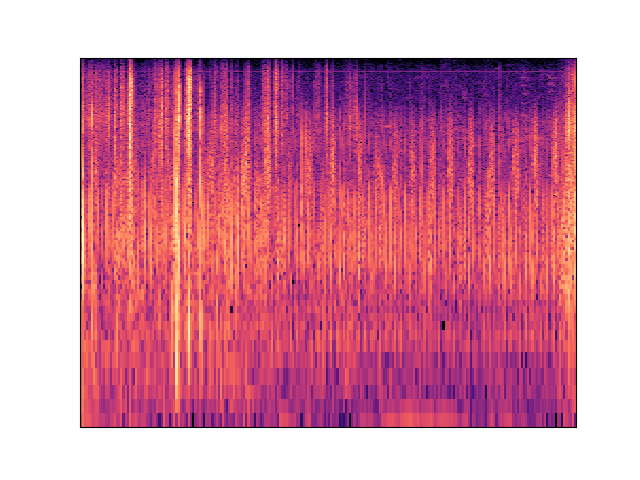

In [ ]:
a

In [ ]:

#Phonocardiogram == PCG
class pcg(data.Dataset):
    def __init__(self, files, classes, transforms=None): 
        # location of the dataset
        # self.root = root
        # list of files
        self.files = files
        # list of classes
        self.classes = classes
        # transforms
        self.transforms = transforms



    def __getitem__(self, item):
        # read the image
        
        image = create_spectrogram_image(self.files[item][0]).convert(mode="RGB")
        # image = im.convert(mode="RGB")
#         print(image)
        # class for that image
        class_ = self.classes[item]
        # apply transformation
        if self.transforms:
            image = self.transforms(image)
        # return the image and class
#         print(type(image), type(class_))
        return image, np.float32(class_)

    def __len__(self):
        # return the total number of images
        return len(self.files)

In [ ]:
import torch
import torchvision


# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 32 # We use a small batch size here for training
batch_size_test = 64 # We use bigger batch size for testing


# define how image transformed
# Augmentation and other can be done here too
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.Resize((224, 224))
                               ,
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.RandomInvert(),
                               torchvision.transforms.RandomAutocontrast(),
                               torchvision.transforms.ColorJitter(),
                               torchvision.transforms.Normalize(
                                 (0.8197, 0.5639, 0.6587), (0.2404, 0.3792, 0.2873))  
                                # (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                 ])

# image datasets
train_dataset = pcg(train_files, train_classes, 
                         transforms=image_transform)

test_dataset = pcg(test_files, test_classes, 
                        transforms=image_transform)

# data loaders
# train_loader = torch.utils.data.DataLoader(train_dataset,
#                                            batch_size=batch_size_train, 
#                                            shuffle=True, num_workers=2)
# test_loader = torch.utils.data.DataLoader(test_dataset,
#                                           batch_size=batch_size_test, 
#                                           shuffle=True, num_workers=2)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


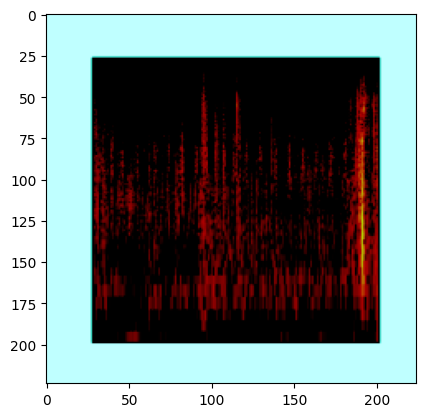

In [ ]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(train_loader))
sample = example_datas[0]
# show the data
plt.imshow(sample.permute(1, 2, 0))
# print("Label: " + str(classes_str[labels[0]]))

In [ ]:
### ALexnet refreneced from AML lab

# define the model which contains pretrained weights from ImageNet
model = AlexNet4(3) # note the pretrained=True flag in the AlexNet4 model
# device: cuda (gpu) or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# map to device
model = model.to(device)

# one can choose which parameters of the model to train or finetune
# Setting 1: make all the parameters of the model trainable
# for param in model.parameters():
#     param.requires_grad = True

# Setting 2: make only the last layer of the classifier handle trainable
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier[6].parameters():
    param.requires_grad = True

# Setting 3: make all the parameters of the conv layer (features handle) 
# not trainable and others (classifier handle) trainable
# for param in model.features.parameters():
#     param.requires_grad = False
# for param in model.classifier.parameters():
#     param.requires_grad = True

parameters = filter(lambda p: p.requires_grad, model.parameters())

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
## create model and optimizer
learning_rate = 0.0001
weight_decay = 0.0005
# define optimizer
optimizer = optim.Adam(parameters, lr=learning_rate, weight_decay=weight_decay)

  0%|          | 0/79 [00:00<?, ?it/s]

c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:291: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


train: Average loss: 0.4511, Accuracy: 19/2524 (59.38%)

train: Average loss: 0.4643, Accuracy: 127/2524 (36.08%)

train: Average loss: 0.4457, Accuracy: 211/2524 (31.40%)

train: Average loss: 0.4240, Accuracy: 337/2524 (33.97%)

train: Average loss: 0.4154, Accuracy: 434/2524 (33.08%)

train: Average loss: 0.4065, Accuracy: 530/2524 (32.48%)

train: Average loss: 0.4022, Accuracy: 640/2524 (32.79%)

train: Average loss: 0.3909, Accuracy: 729/2524 (32.09%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:291: UserWarning: Using a target size (torch.Size([28, 1])) that is different to the input size (torch.Size([28, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


Train: Average loss: 0.3858
, Accuracy: 822/2524 (32.57%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:351: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss
c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:351: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.3203, Accuracy: 249/631 (39.46%)

Classification report:
              precision    recall  f1-score   support

      Absent       0.43      0.73      0.54       278
     Present       0.32      0.17      0.22       244
     Unknown       0.16      0.05      0.07       109

    accuracy                           0.39       631
   macro avg       0.30      0.31      0.28       631
weighted avg       0.34      0.39      0.34       631

     0   1   2
0  203  63  12
1  189  41  14
2   78  26   5


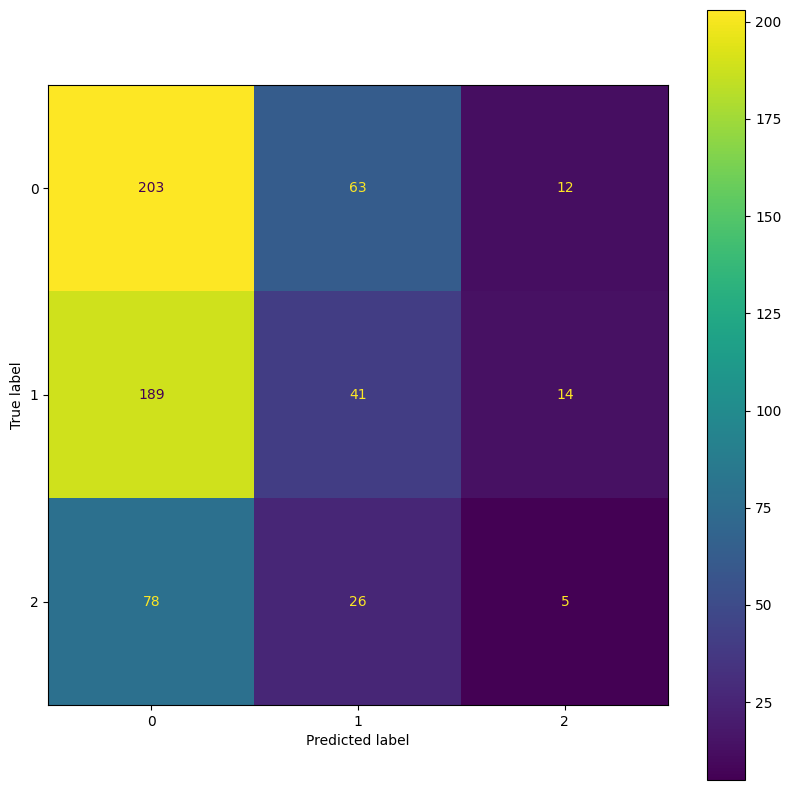

In [ ]:
num_epoch = 5
for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer)
test(model, device, test_loader)

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
## Hyperparameter
# BATCH_SIZE=16
num_epochs=5
lr=0.0001
class_size=3

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
model = VGG16()
model = model.to(device=device) 
load_model = True
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr= lr)  

  0%|          | 0/79 [00:00<?, ?it/s]

c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:291: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


train: Average loss: 0.4259, Accuracy: 19/2524 (59.38%)

train: Average loss: 0.3191, Accuracy: 195/2524 (55.40%)

train: Average loss: 0.3315, Accuracy: 349/2524 (51.93%)

train: Average loss: 0.3398, Accuracy: 492/2524 (49.60%)

train: Average loss: 0.3364, Accuracy: 613/2524 (46.72%)

train: Average loss: 0.3354, Accuracy: 741/2524 (45.40%)

train: Average loss: 0.3368, Accuracy: 864/2524 (44.26%)

train: Average loss: 0.3394, Accuracy: 978/2524 (43.05%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:291: UserWarning: Using a target size (torch.Size([28, 1])) that is different to the input size (torch.Size([28, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


Train: Average loss: 0.3370
, Accuracy: 1074/2524 (42.55%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:351: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss
c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:351: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.3137, Accuracy: 152/631 (24.09%)

Classification report:
              precision    recall  f1-score   support

      Absent       0.19      0.73      0.31       124
     Present       0.39      0.20      0.26       274
     Unknown       0.29      0.03      0.06       233

    accuracy                           0.24       631
   macro avg       0.29      0.32      0.21       631
weighted avg       0.31      0.24      0.20       631

     0   1   2
0   90  25   9
1  209  54  11
2  167  58   8


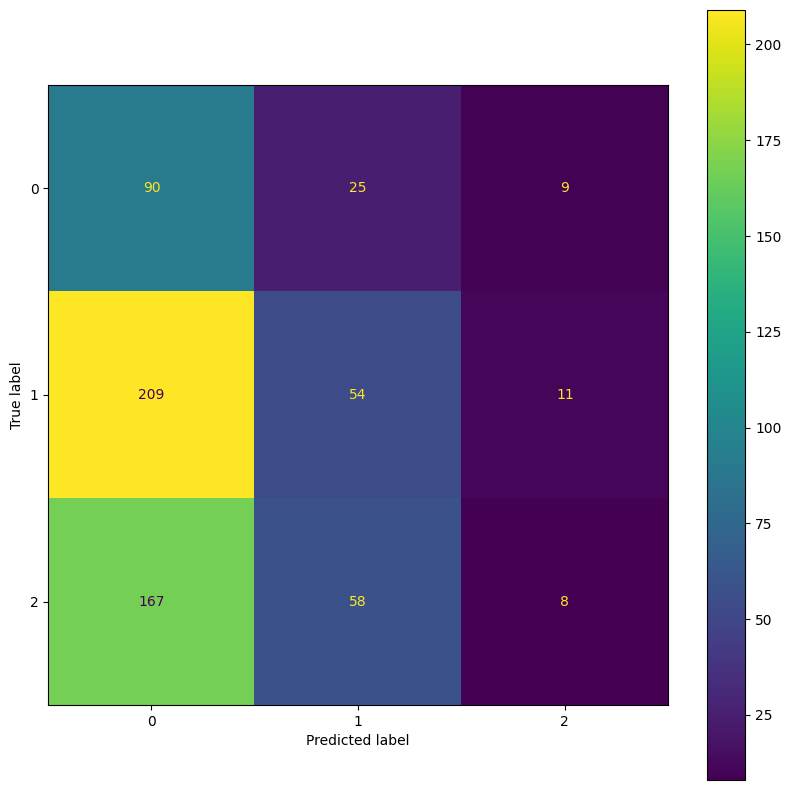

In [ ]:
num_epoch = 5
for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer)
test(model, device, test_loader)

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

c:\Users\deepe\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\deepe\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\deepe/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

  0%|          | 0/79 [00:00<?, ?it/s]

c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:291: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


train: Average loss: 0.6602, Accuracy: 8/2524 (25.00%)

train: Average loss: 0.4682, Accuracy: 108/2524 (30.68%)

train: Average loss: 0.4718, Accuracy: 211/2524 (31.40%)

train: Average loss: 0.4512, Accuracy: 318/2524 (32.06%)

train: Average loss: 0.4360, Accuracy: 424/2524 (32.32%)

train: Average loss: 0.4216, Accuracy: 517/2524 (31.68%)

train: Average loss: 0.4006, Accuracy: 601/2524 (30.79%)

train: Average loss: 0.3877, Accuracy: 709/2524 (31.21%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:291: UserWarning: Using a target size (torch.Size([28, 1])) that is different to the input size (torch.Size([28, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target)


Train: Average loss: 0.3903
, Accuracy: 797/2524 (31.58%)



c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:351: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss
c:\Users\deepe\Course-Work AI and Health\python-classifier-2022\models.py:351: UserWarning: Using a target size (torch.Size([55, 1])) that is different to the input size (torch.Size([55, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss_this = F.mse_loss(output, target) # sum up batch loss


Test: Average loss: 0.3317, Accuracy: 212/631 (33.60%)

Classification report:
              precision    recall  f1-score   support

      Absent       0.29      0.75      0.42       181
     Present       0.49      0.25      0.33       268
     Unknown       0.32      0.05      0.09       182

    accuracy                           0.34       631
   macro avg       0.37      0.35      0.28       631
weighted avg       0.38      0.34      0.29       631

     0   1   2
0  136  35  10
1  192  67   9
2  138  35   9


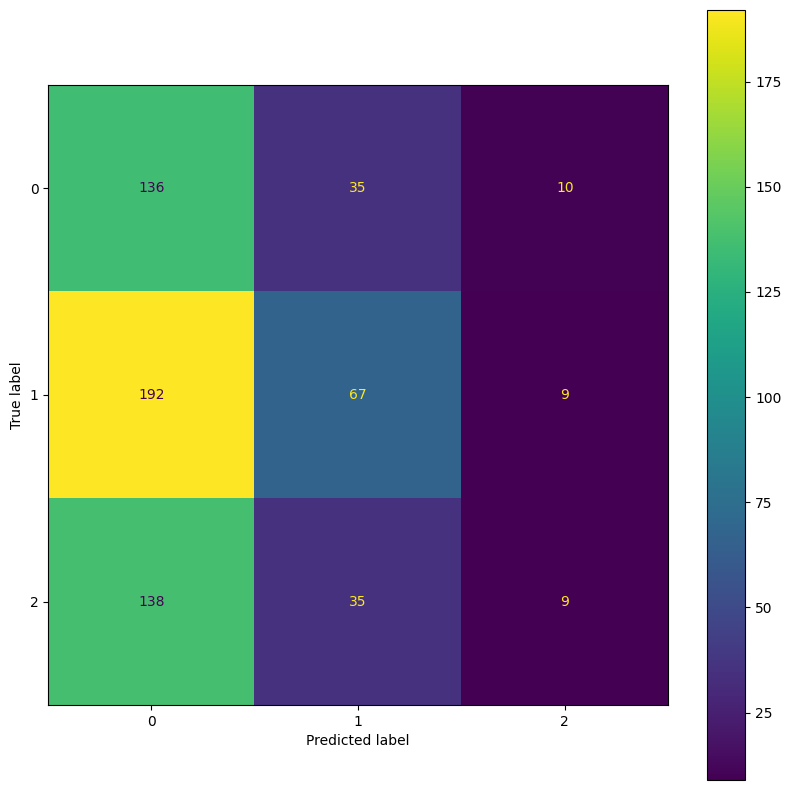

In [ ]:
from torchvision.models import resnet50

# define the model which contains pretrained weights from ImageNet
model = resnet50(pretrained=True)
num_classes = 3 # default number of classes in the pretrained model
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# device: cuda (gpu) or cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# map to device
model = model.to(device)

# one can choose which parameters of the model to train or finetune

# Setting : make only the last layer of the classifier handle trainable
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True
parameters = filter(lambda p: p.requires_grad, model.parameters())
learning_rate = 0.00001
weight_decay = 0.0005
# define optimizer
optimizer = optim.Adam(parameters, lr=learning_rate, weight_decay=weight_decay)

num_epoch = 5
for epoch in range(1, num_epoch + 1):
    train(model, device, train_loader, optimizer)
test(model, device, test_loader)

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))